In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from datetime import datetime
from library.sb_utils import save_file



In [2]:
#Upload the CSV file from the RawData directory
train_data = pd.read_csv('../RawData/fraudTrain.csv')

In [3]:
#Call the head method on train_data to print the first several rows of the data
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#Call the info method on train_data to see a summary of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

There is no missing value in the data. Our target feature is `is_fraud`. The column headings are plausible. 

In [5]:
#check the values in `Unnamed: 0` column and if it can be removed from the dataset
print(train_data['Unnamed: 0'].unique)
print(train_data['Unnamed: 0'].max())
print(train_data['Unnamed: 0'].min())

<bound method Series.unique of 0                0
1                1
2                2
3                3
4                4
            ...   
1296670    1296670
1296671    1296671
1296672    1296672
1296673    1296673
1296674    1296674
Name: Unnamed: 0, Length: 1296675, dtype: int64>
1296674
0


There are 1296675 unique values from 0 to 1296674, therefore this column has the same values an index and can be removed from the dataset. 

In [6]:
#Drop the "Unnamed: 0" column since it does not add any information 
train_data.drop(columns= 'Unnamed: 0', inplace=True)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
#convert trans_date_trans_time object and dob object to datetime 

train_data['trans_date_trans_time']= pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob']= pd.to_datetime(train_data['dob'])

In [8]:
#Check if the unix_time is equal to the trans_date_trans_time

train_data['unix_time']= pd.to_datetime(train_data['unix_time'], unit='s')
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0


unix_time does not look to be a useful column. We can drop it. 

In [9]:
train_data.drop(columns= ['unix_time'], axis=1, inplace=True)

In [10]:
#Separate year, month, day of the month, day of the week, and hour from the trans_date_trans_time column

train_data['trans_year'] = [d.year for d in train_data['trans_date_trans_time']]
train_data['trans_month'] = [d.month for d in train_data['trans_date_trans_time']]
train_data['trans_day_of_month'] = [d.day for d in train_data['trans_date_trans_time']]
train_data['trans_day_of_week'] = [d.weekday() for d in train_data['trans_date_trans_time']]
train_data['trans_hour'] = [d.hour for d in train_data['trans_date_trans_time']]


In [11]:
#remove the trans_date_trans_time column from the dataset
train_data.drop(columns='trans_date_trans_time', inplace= True)
train_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day_of_month,trans_day_of_week,trans_hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2019,1,1,1,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2019,1,1,1,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2019,1,1,1,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2019,1,1,1,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2019,1,1,1,0


In [12]:
#calculate the age of the costumers, keep the dob column for some further analysis and remove it at the end
age_year= [d.year for d in train_data['dob']]
train_data['age']= train_data['trans_year'] - age_year

In [13]:
#check the values in `is_fraud` column
train_data['is_fraud'].unique()

array([0, 1])

In [14]:
#check how many fraud has been detected
num_fraud= (train_data[train_data['is_fraud']==1].shape)[0]
train_data_rows= (train_data.shape)[0]
percent_fraud= (num_fraud/train_data_rows)*100

print('Number of fraud transactions are {} which is %{:0.2f} of the total transactions.'.format(num_fraud,percent_fraud))


Number of fraud transactions are 7506 which is %0.58 of the total transactions.


In [15]:
#check if trans_num is a unique number for each transaction
trans_number= len(train_data['trans_num'].unique())
if trans_number== train_data_rows:
    print(f'`trans_num` is unique for each transaction')
else:
    print(f'`trans_num` is NOT unique for each transaction')

`trans_num` is unique for each transaction


In [16]:
#Use pandas' Series method `value_counts` to see different categories
category_count= train_data['category'].value_counts()
print(category_count)

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64


In [17]:
#Use pandas' Series method `value_counts` to see which categories had the most fraud transactions
category_count_fraud= train_data['category'][train_data['is_fraud']==1].value_counts()
print(category_count_fraud)


grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64


,is_fraud
category,
entertainment,0.002478
food_dining,0.001651
gas_transport,0.004694
grocery_net,0.002948
grocery_pos,0.014098
health_fitness,0.001549
home,0.001608
kids_pets,0.002114
misc_net,0.014458


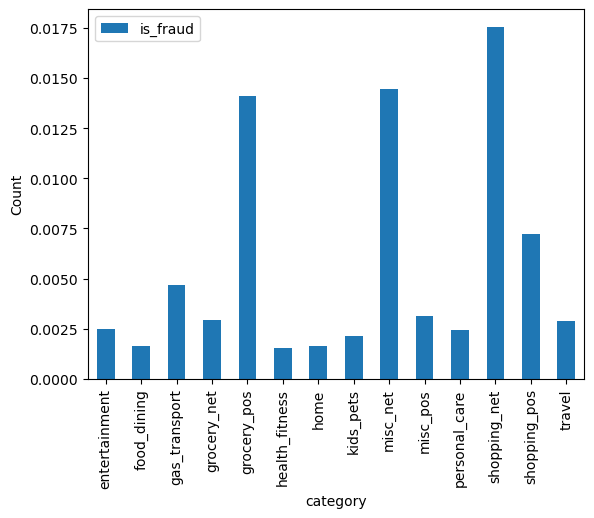

In [18]:
#Plot a bar plot to show the the number of frauds for each category

train_data.groupby([ 'category'])[['is_fraud']].mean().plot(kind='bar').set_ylabel('Count')
train_data.groupby(['category' ])[['is_fraud']].mean()

Most of the fraud transactions are related to shopping_net, misc_net, grocery_pos, and shopping_pos.

In [19]:
#create dummy variables for category and age and drop `category` and `gender` column

train_data = pd.get_dummies(train_data, columns= ['category', 'gender'], drop_first= True)
# train_data = pd.concat([train_data, dummies], axis=1)


In [20]:
#Use pandas' Series method `value_counts` to see different merchants
merchant_counts= train_data['merchant'].value_counts()
print(merchant_counts)

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64


There are 693 unique merchants in the dataset.

In [21]:
#Use pandas' Series method `unique` to see how many unique state and city are in the dataset
train_data[['state', 'city']].nunique()

state     51
city     894
dtype: int64

There are 50 states in the USA, however, there are 51 states in the dataset. Take a closer look to see what's the 51st state.


In [22]:
#find the total number of transactions per state
state_count_trans= train_data['state'].value_counts()
print(state_count_trans)

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64


DC has been reported as a state. Let's see what cities are included in DC. 

In [23]:
#check what cities are included in DC state

train_data['city'][train_data['state']=='DC'].unique()

array(['Washington'], dtype=object)

This looks to be ok! Only Washington is in DC which can be left as is.

In [24]:
#find the number of fraud transactions per state

state_count_fraud = train_data.groupby('state')['is_fraud'].agg(sum)
state_count_fraud.head()

state
AK     36
AL    215
AR    161
AZ     37
CA    326
Name: is_fraud, dtype: int64

Text(0, 0.5, 'Count')

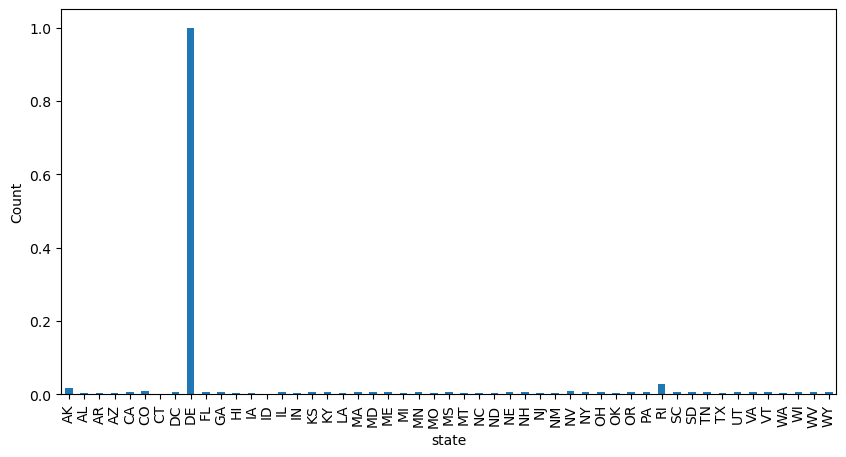

In [25]:
#Plot the number of fraud transactions per state

train_data.groupby('state')['is_fraud'].mean().plot(kind='bar' , figsize=(10,5)).set_ylabel('Count')
#train_data.groupby(['state' ])[['is_fraud']].mean()

Most of the fraud transactions happened in DE (Delaware) which is significantly higher than the other states. The second and third states after Delaware with the highest fraud transactions are Rhode Island and Arkansas.

In [26]:
#Use groupby method to find the number of customers and the number of fraud trandactions for each of them
train_data.groupby(['first','last','dob'])['is_fraud'].agg(sum)


first    last      dob       
Aaron    Murray    1974-12-23     8
         Pena      1950-11-27     0
         Rogers    1945-03-15    12
         Stewart   1995-04-22     8
Adam     Keller    1932-09-17    14
                                 ..
William  Thompson  1937-03-17    12
Willie   Jordan    1957-08-08     4
Xavier   Beltran   1984-06-04    13
Zachary  Allen     1969-07-24     8
         Boone     1927-12-11     7
Name: is_fraud, Length: 983, dtype: int64

Data includes information for 983 customers and their transactions.

In [27]:
#check how many cc_num we have and find what that is...
cc_counts= train_data['cc_num'].value_counts()
print(cc_counts)

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64


It seems like there is one cc_num per costumer (983 `cc_num`s for 983 costumers). This should be the account number. Let's explore further to make sure.

In [28]:
#Use groupby method to make sure each unique cc_num is assigned to a customer
#First remove duplicate cc_num to only have unique values
#Then use groupby to see how many customers will remain with a unique cc_num

train_data_uniqueCC = train_data.drop_duplicates(subset= ['cc_num'])
train_data_uniqueCC.groupby(['first','last','dob', 'cc_num']).size()


first    last      dob         cc_num             
Aaron    Murray    1974-12-23  376028110684021        1
         Pena      1950-11-27  4958589671582726883    1
         Rogers    1945-03-15  4260059589824237       1
         Stewart   1995-04-22  4228411452607671       1
Adam     Keller    1932-09-17  4917226033950          1
                                                     ..
William  Thompson  1937-03-17  4988304376504          1
Willie   Jordan    1957-08-08  213120463918358        1
Xavier   Beltran   1984-06-04  349612764943496        1
Zachary  Allen     1969-07-24  213195754007681        1
         Boone     1927-12-11  374821819075109        1
Length: 983, dtype: int64

We checked that there are 983 customers, each with a unique cc_num

In [29]:
# we don't need `dob` anymore. We can drop it from the dataset
train_data.drop(columns=['dob'], axis=1, inplace=True)

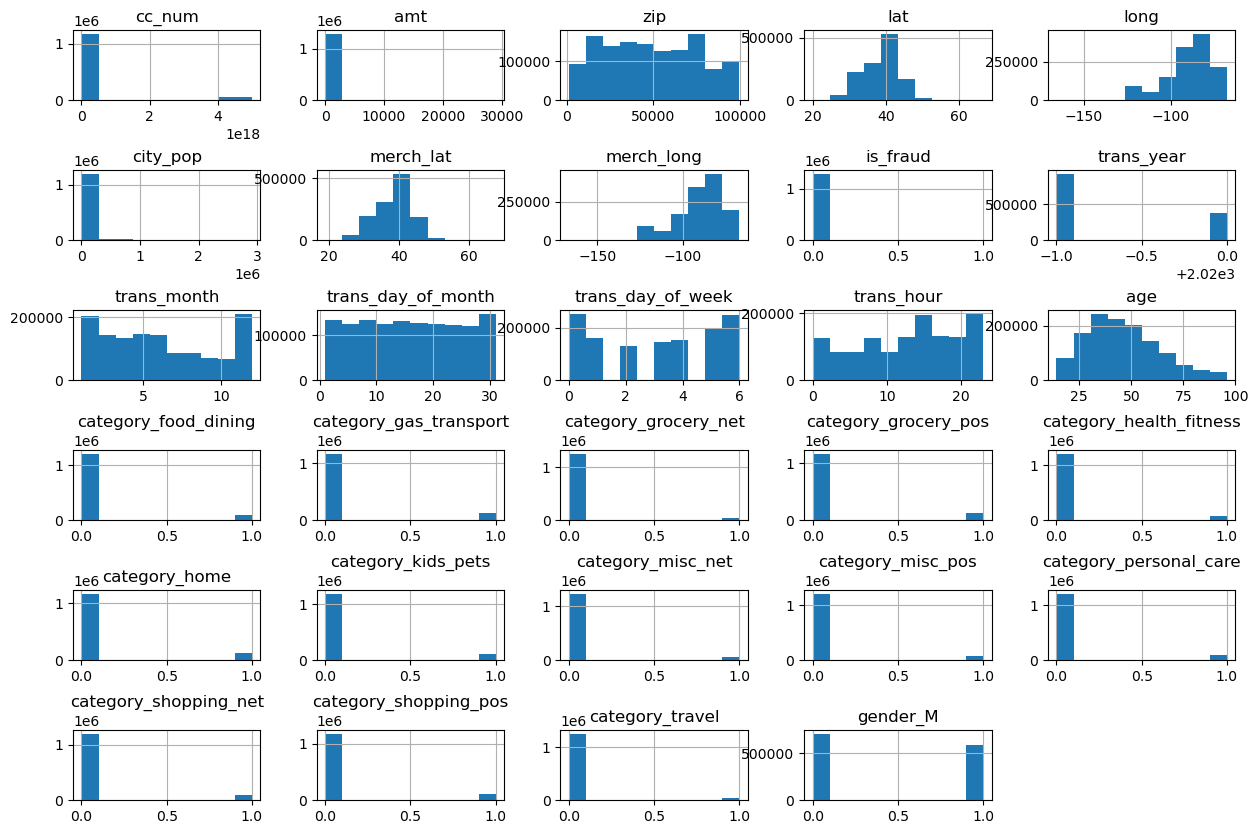

In [30]:
#Use `hist` method to plot histograms of each of the numeric features

train_data.hist(figsize= (15,10))
plt.subplots_adjust(hspace=1);

Possible cause for concerns are `cc_num`, `amt`, and `city_pop` because the values are clusters down the low end. And `trans_year` because year can not get a negative number. 

## cc_num

In [31]:
#Filter the `cc_num` column to find the values greater than 1e18
train_data.cc_num[train_data.cc_num>1e18]

19         4956828990005111019
20         4469777115158234880
24         4428780983793657331
28         4225990116481262579
31         4599735407877245080
                  ...         
1296647    4710826438164847414
1296660    4040099974063068803
1296666    4587657402165341815
1296669    4400011257587661852
1296674    4292902571056973207
Name: cc_num, Length: 118789, dtype: int64

There are 118789 rows with cc_num greater than 1e18. This can be just a specific format for account number. We will explore this later in more detail.

## amt

In [32]:
#Filter the `amt` column to find the values greater than 5000
train_data.amt[train_data.amt > 5000]

12084       5444.24
17743      11872.21
25944       6337.25
37315      10776.59
42665       5234.79
             ...   
1262258    10665.33
1270060    10881.08
1270196     6438.07
1277159     6202.65
1290513    12176.55
Name: amt, Length: 136, dtype: float64

In [33]:
#Filter the `amt` column to find the values greater than 20000
train_data.amt[train_data.amt > 20000]

352894     25086.94
606211     26544.12
787549     28948.90
793677     27390.12
1234797    27119.77
Name: amt, dtype: float64

In [34]:
train_data[train_data['amt'] > 20000]

,cc_num,merchant,amt,first,last,street,city,state,zip,lat,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
352894,5540636818935089,fraud_Hackett Group,25086.94,Kenneth,Foster,329 Michael Extension,Lawrence,MA,1843,42.6911,...,0,0,0,0,0,0,0,0,1,1
606211,30408301059761,fraud_Boyer-Haley,26544.12,Brandon,Pittman,2881 Frey Village,Cross,SC,29436,33.3364,...,0,0,0,0,0,0,0,0,1,1
787549,4979422371139333,fraud_Satterfield-Lowe,28948.90,Kelly,Zimmerman,1893 Katie Tunnel,Westerville,NE,68881,41.4193,...,0,0,0,0,0,0,0,0,1,0
793677,675909898057,"fraud_Monahan, Hermann and Johns",27390.12,Christopher,Henry,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,...,0,0,0,0,0,0,0,0,1,1
1234797,60423098130,"fraud_Monahan, Hermann and Johns",27119.77,Jason,Gray,875 Amy Point,Amorita,OK,73719,36.9412,...,0,0,0,0,0,0,0,0,1,1


There are 136 transactions for more than `$5000`. There are 6 transaction with more than `$20,000`. Looking at the category, all 6 transactions are related to `travel`. Nothing seems wrong at this time. We can leave this column as is for now. 

,mean,std
is_fraud,,
0,67.667110,154.007971
1,531.320092,390.560070


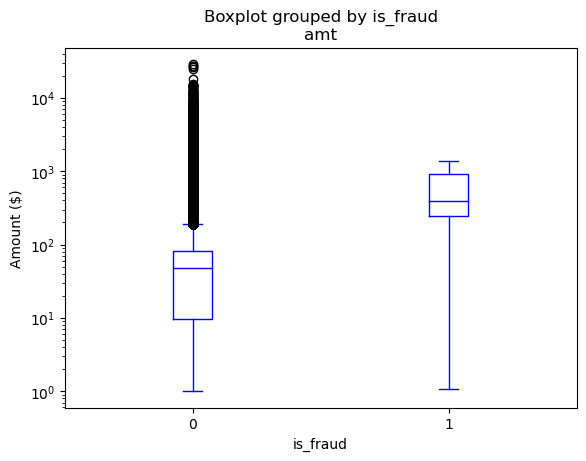

In [56]:
train_data.boxplot(column=['amt'],by = ['is_fraud'], color='blue', vert=True).set_yscale('log')
plt.grid(False)
plt.xlabel('is_fraud')
plt.ylabel('Amount ($)')
pd.DataFrame(train_data.groupby( ['is_fraud'])['amt'].describe().loc[:,['mean','std']])



The boxplot shows that most of the fraud transactions are between `$100` and `$1000`. The non-fraud transactions are mostly between $10 to $100, however, it goes up to about $10,000. 

## city_pop

In [40]:
#Filter the `city_pop` column to find the values greater than 2e6
train_data.city_pop[train_data.city_pop > 2e6]

608        2906700
1587       2906700
1977       2504700
1990       2906700
2189       2504700
            ...   
1295229    2906700
1295503    2504700
1295580    2906700
1295652    2906700
1296331    2906700
Name: city_pop, Length: 6722, dtype: int64

In [41]:
#check which cities have more than 2e6 population
train_data['city'][train_data['city_pop']>2e6].value_counts()

Houston        4168
Brooklyn       2033
Los Angeles     521
Name: city, dtype: int64

Checking the population of these cities online, seems like the populations are correctly reported so we can leave this column as is. 

## trans_year

In [42]:
#Filter the `trans_year` column to find the negative values 
train_data['trans_year'][train_data['trans_year'] < 0]


Series([], Name: trans_year, dtype: int64)

In [43]:
train_data['trans_year'].unique()

array([2019, 2020])

There is no negative value in the trans_year column and it only contains 2019 and 2020. We need to look into this in more detail in the next step. 

In [44]:
# save the data to a new csv file
datapath = '../data'
save_file(train_data, 'train_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/train_data_cleaned.csv"
